In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Apply SMOTE to your training dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [8]:
# Standardize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [9]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "ANN": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "CART": DecisionTreeClassifier(),
    "Light GBM": LGBMClassifier()
}

results = []

for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2 * (sensitivity * (1 - specificity)) / (sensitivity + (1 - specificity))
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    results.append({
        "Model": model_name,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "F1-Score": f1,
        "Accuracy": accuracy
    })


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3114, number of negative: 3114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 6228, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [10]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

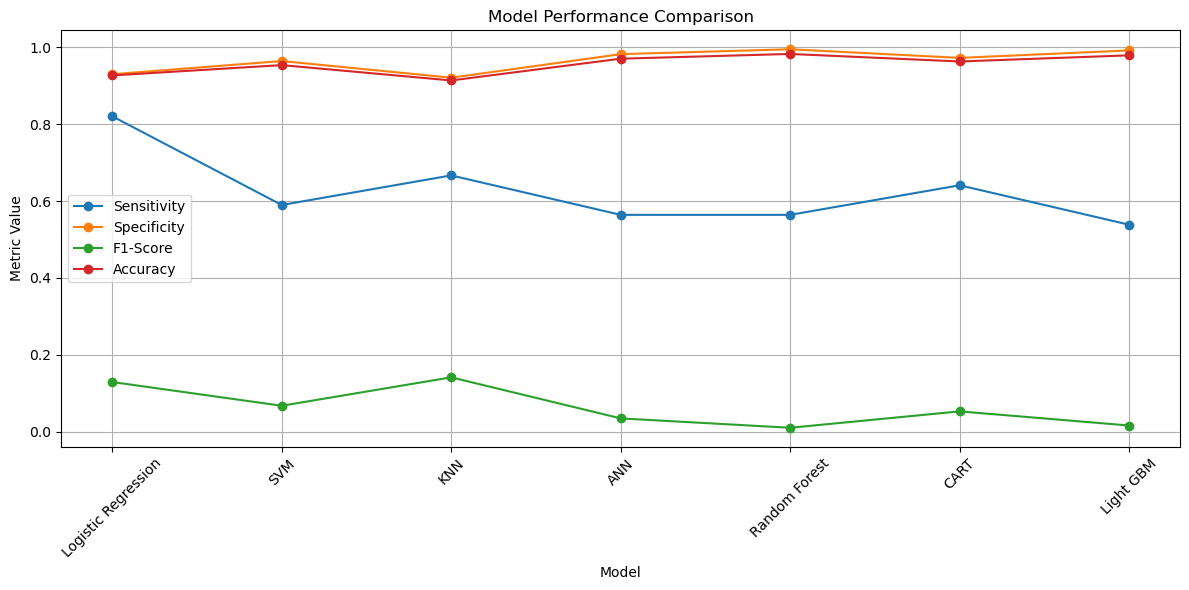

In [12]:
# Plot the results as line charts
plt.figure(figsize=(12, 6))
metrics = ["Sensitivity", "Specificity", "F1-Score", "Accuracy"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()